# Plot data from Rigol DS1054Z scope

### Import the libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import csv

### Import local libraries

In [2]:
from appvib import ClSigFeatures

### Define plot mode. 
Interactive mode is helpful for visuallizing the program execution

In [3]:
#%matplotlib widget

### Define function to read header values

In [4]:
def get_header(str_filename_in):
    """
    
    Pulls in the header information from the scope files
    
    Parameters
    ----------
    str_filename_in : string
        full file name to read
        
    Returns
    -------
    list : header values
    
    """
    
    # Read the CSV headers
    print(str_filename_in)
    file_handle = open(str_filename_in)
    csv_reader = csv.reader(file_handle)
    lst_header = next(csv_reader)
    print(lst_header)
    file_handle.close()

    return lst_header

### Define files to read

A helpful discussion on getting .csv files into Panda:
https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

#### Read in the first data set and visualize the results

test010_000.csv
['X', 'CH1', 'CH2', 'Delta Time', 'Sampling Frequency']
ylim_tb[0] : -0.500000 | ylim_tb[1] : 0.500000 | i_y_divisions_tb : 9.000000


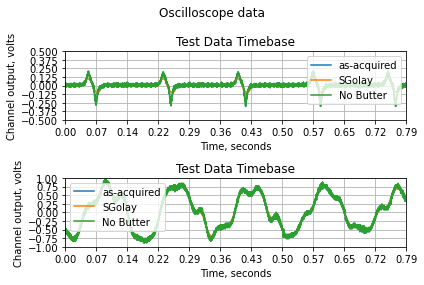

In [5]:
str_filename = 'test010_000.csv'
csv_header = get_header(str_filename_in=str_filename)
df1 = pd.read_csv(str_filename, header=None, skiprows=2, names=csv_header[0:5])
class1 = ClSigFeatures(df1.CH1, df1['Sampling Frequency'][0])
class1.idx_add_sig(df1.CH2, d_fs=df1['Sampling Frequency'][0])
class1.ylim_tb(ylim_tb_in=[-0.5, 0.5])
class1.ylim_tb(ylim_tb_in=[-1.0, 1.0], idx=1)
lst_plot_sig = class1.plt_sigs()

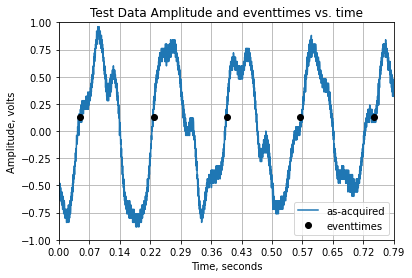

In [6]:
np_d_eventtimes = class1.np_d_est_triggers(np_d_sig=class1.np_d_sig, i_direction=0, d_threshold=0.125)
lst_plt_eventtimes = class1.plt_eventtimes(idx_eventtimes=0, idx=1)

In [7]:
class1.np_d_eventtimes()

array([0.050249  , 0.22305814, 0.39678929, 0.56959843, 0.7433625 ])

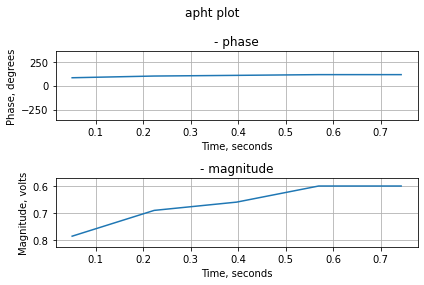

In [8]:
np_d_nx = class1.calc_nx(np_d_sig=class1.get_np_d_sig(idx=1), np_d_eventtimes=class1.np_d_eventtimes(),
                                          b_verbose=False)
lst_apht = class1.plt_apht()